In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
ROOT_PATH='/content/drive/My Drive/Colab Notebooks/learning_ai/'
sys.path.append(ROOT_PATH)

Mounted at /content/drive


In [2]:
from common import config
config.GPU=True
from common.np import *
from model.deep_conv_resnet import DeepConvResNet
from common.optimizer import *
from common.trainer import Trainer
from dataset.mnist import load_mnist
from common.util import to_cpu,to_gpu

(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True)

if GPU:
    x_train=to_gpu(x_train)
    x_test=to_gpu(x_test)
    t_train=to_gpu(t_train)
    t_test=to_gpu(t_test)

x_train=x_train.reshape(x_train.shape[0],1,28,28)
x_test=x_test.reshape(x_test.shape[0],1,28,28)

input_dim=(1,28,28)
res_layer_list_1=[['conv',[16,3,3,1,1,2]],['relu',[]],['conv',[16,3,3,1,1,2]]]
res_layer_list_2=[['conv',[32,3,3,1,1,2]],['relu',[]],['conv',[32,3,3,1,1,2]]]
res_layer_list_3=[['conv',[64,3,3,1,1,2]],['relu',[]],['conv',[64,3,3,1,1,2]]]
output_size=10
lr=0.001

max_epoch=20
batch_size=100
clip_grads=None
eval_interval=100
eval_accuracy=True

args_model=(input_dim,res_layer_list_1,res_layer_list_2,res_layer_list_3,output_size)
args_trainer=(x_train,t_train,max_epoch,batch_size,clip_grads,eval_interval,eval_accuracy,x_test,t_test)

model=DeepConvResNet(*args_model)
optimizer=Adam(lr)
trainer=Trainer(model,optimizer)

trainer.fit(*args_trainer)

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------

| epoch 1 |  iter 1 / 600 | time 15[s] | loss 13.91 | train_acc 0.11 | test_acc 0.11


KeyboardInterrupt: ignored

In [ ]:
model.save_params(ROOT_PATH+'pkl/DeepConvRes.pkl')

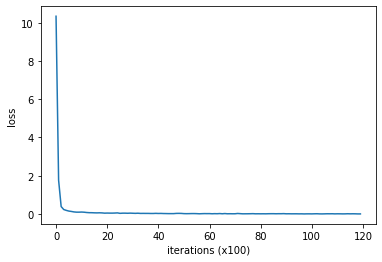

In [ ]:
trainer.plot()

In [ ]:
print(trainer.test_acc_list[-1])

0.9922
